In [1]:
%matplotlib inline
import numpy as np
import csv

T = 30
output_filepath = './results.txt'
plot_result = False

In [ ]:
instances = ["mtsp51","mtsp100","mtsp150","pr76","pr152","pr226"]
# numGenerations = [105,109,110,107,110,111] # Generation number for baseline 
numGenerations = [105,109,110,107,110,111] # Generation number for original 

results_file = open(output_filepath,'a')

from GA_for_mTSP.improved_baseline.main import ImporvedBaseline

writer = csv.writer(results_file,delimiter=',')
algorithm_name = "baseline"

for i in range(len(instances)):
    instance = instances[i]
    city = np.genfromtxt('./instances/'+instance+'.txt', dtype=int, skip_header=1)


    distances_baseline = [instance, algorithm_name, "distance"]
    time_baseline =  [instance, algorithm_name, "time"]
    count_baseline =  [instance, algorithm_name, "count"]
    
    for k in range(T):
        imporved_baseline = ImporvedBaseline(numGenerations=numGenerations[i]+1,plot_progress=False,seedValue=k,plot_result = plot_result)
        t,d,c = imporved_baseline.GA(city=city)
        time_baseline.append(t)
        distances_baseline.append(d)
        count_baseline.append(c)
        print(f"epoch {k}, time cost: {t}, min distance: {d}, steps: {c}")


    writer.writerow(distances_baseline)
    writer.writerow(time_baseline)
    writer.writerow(count_baseline)
    results_file.flush()


results_file.close()




Initial minimum distance: 1515.579282151414


100% |########################################################################|


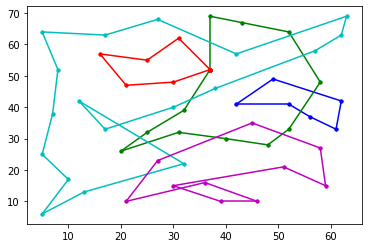

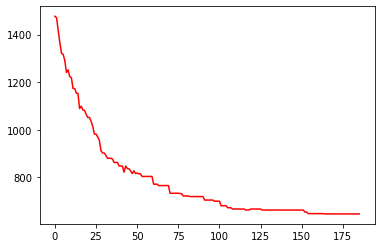

epoch 0, time cost: 10.8094981, min distance: 646.9210378646437, steps: 1018270
Initial minimum distance: 1521.0828871684384


In [2]:
numGenerations = [186,193,195,190,195,197] # Generation number for modified 
# numGenerations = [105,109,110,107,110,111] # Generation number for original 


instances = ["mtsp51","mtsp100","mtsp150","pr76","pr152","pr226"]

results_file = open(output_filepath,'a')

from GA_for_mTSP.ours.main import MultiChromosome

writer = csv.writer(results_file,delimiter=',')
algorithm_name = "ours_nocrossover"

for i in range(len(instances)):
    instance = instances[i]
    city = np.genfromtxt('./instances/'+instance+'.txt', dtype=int, skip_header=1)
    distances_our = [instance, algorithm_name, "distance"]
    time_our =  [instance, algorithm_name, "time"]
    count_our =  [instance, algorithm_name, "count"]
    
    for k in range(T):
        ours = MultiChromosome(numGenerations=numGenerations[i],plot_progress=False,seedValue=k,plot_result = plot_result)
        t,d,c = ours.GA(city=city)
        time_our.append(t)
        distances_our.append(d)
        count_our.append(c)
        print(f"epoch {k}, time cost: {t}, min distance: {d}, steps: {c}")


    writer.writerow(distances_our)
    writer.writerow(time_our)
    writer.writerow(count_our)
    results_file.flush()


results_file.close()
